# Downloading Data
To download data from yfinance, uncomment and run the following cell. This downloads the past 60 days of data from the first 100 tech stocks listed on https://companiesmarketcap.com/tech/largest-tech-companies-by-market-cap/ and saves it in a folder called `yf_data`. Make sure to run this notebook from the root directory.


In [1]:
# # load and store data
# !python3 atgym/atdata/data_loader.py

# Importing
The library atgym provides a data loader class and an OpenAI-stle trading environment.

In [2]:
from atgym.atdata import TradingDataLoader
from atgym.atsim import TradingEnv

# Developing Strategies
After loading in data and splitting it into train and test, an environment can be initialized and strategies implemented.

In [3]:
# load data using the TradingDataLoader class
tdl = TradingDataLoader()
tdl.load_data()

In [4]:
# split data into train and test
train_data, test_data = tdl.train_test_split(train_size=None, test_size=0.2,
                         split_time=True)

In [5]:
# initialize an environment using the loaded data
env = TradingEnv(train_data, trading_cost_pct=1.4)

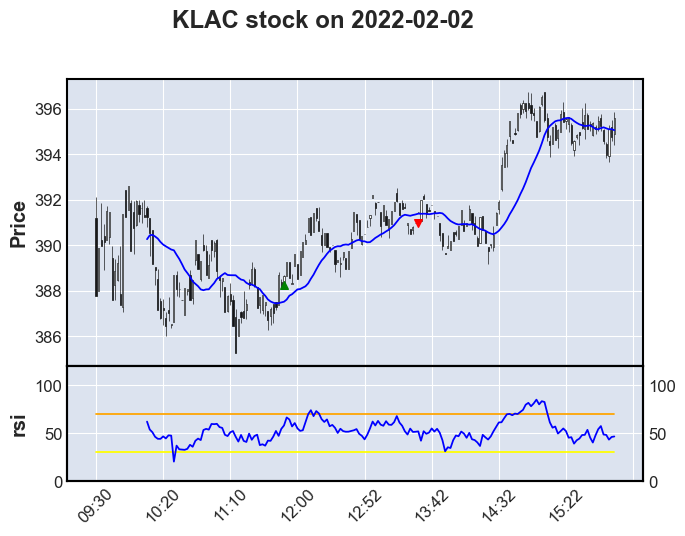

In [6]:
# boiler-plate code for executing a strategy
# env.render() plots a graph of the price of a particular security
#  at a particular day

state = env.reset()
cnt = 0
rewards = []
while True:
    action = 0
    if cnt == 50:
        action = 1
    if cnt == 100:
        action = 2
    state, reward, done, info = env.step(action)

    rewards.append(reward)
    cnt += 1
    if done:
        env.render()
        break